In [49]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

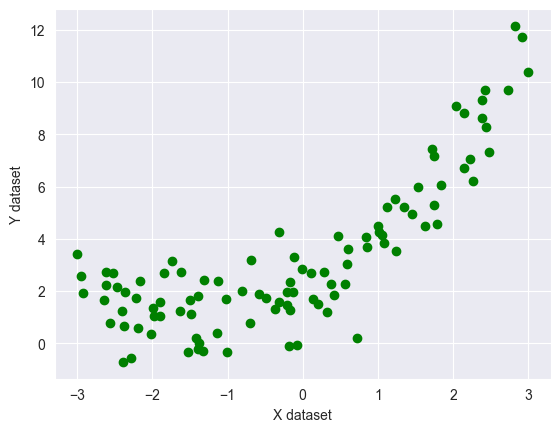

In [50]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

##Quadratic equation used - y=0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X,y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
##Lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
from sklearn.metrics import r2_score
score_1 = r2_score(y_test, regression_1.predict(X_test))
print("Accuracy score for Linear Regression:",score_1)

Accuracy score for Linear Regression: 0.5864656343550475


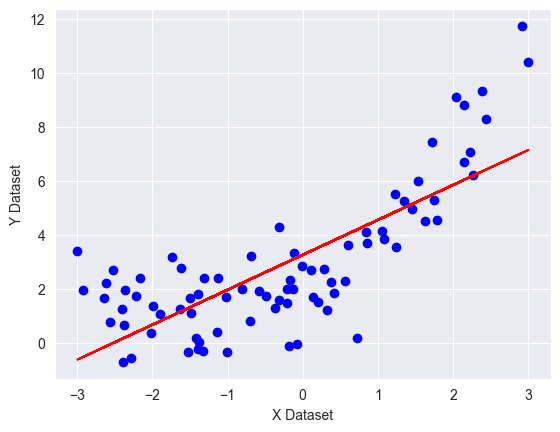

In [54]:
#Lets visualize the model
plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train, color='b')
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, regression_1.predict(X_test))
print(mse)

4.346362158454934


## Lets apply Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [58]:
X_train_poly

array([[ 1.00000000e+00, -1.30868062e+00,  1.71264498e+00],
       [ 1.00000000e+00, -1.50540411e+00,  2.26624153e+00],
       [ 1.00000000e+00, -3.65659769e-01,  1.33707067e-01],
       [ 1.00000000e+00,  1.08192096e+00,  1.17055296e+00],
       [ 1.00000000e+00, -1.13877113e+00,  1.29679969e+00],
       [ 1.00000000e+00,  1.34150129e+00,  1.79962572e+00],
       [ 1.00000000e+00, -2.16162935e+00,  4.67264143e+00],
       [ 1.00000000e+00,  7.16775160e-01,  5.13766631e-01],
       [ 1.00000000e+00, -1.63820439e-01,  2.68371364e-02],
       [ 1.00000000e+00,  2.38491203e+00,  5.68780541e+00],
       [ 1.00000000e+00, -2.02835871e-01,  4.11423906e-02],
       [ 1.00000000e+00, -2.52114940e+00,  6.35619428e+00],
       [ 1.00000000e+00, -1.23258342e-01,  1.51926188e-02],
       [ 1.00000000e+00,  5.61371734e-01,  3.15138224e-01],
       [ 1.00000000e+00, -2.61247887e+00,  6.82504582e+00],
       [ 1.00000000e+00,  2.14752538e+00,  4.61186524e+00],
       [ 1.00000000e+00,  2.08549256e-01

In [59]:
X_test_poly

array([[ 1.        ,  0.47471719,  0.22535641],
       [ 1.        , -1.97599889,  3.9045716 ],
       [ 1.        , -1.8483261 ,  3.41630939],
       [ 1.        , -1.894432  ,  3.58887262],
       [ 1.        , -2.61173266,  6.82114749],
       [ 1.        , -0.16652501,  0.02773058],
       [ 1.        ,  2.38706908,  5.69809877],
       [ 1.        ,  2.42655493,  5.88816881],
       [ 1.        , -2.95155832,  8.71169652],
       [ 1.        , -2.47092158,  6.10545344],
       [ 1.        ,  2.47128231,  6.10723627],
       [ 1.        ,  1.74810457,  3.05586957],
       [ 1.        ,  1.11483408,  1.24285502],
       [ 1.        ,  1.01611496,  1.03248962],
       [ 1.        ,  0.58265363,  0.33948525],
       [ 1.        ,  2.82164451,  7.96167772],
       [ 1.        ,  2.730645  ,  7.45642211],
       [ 1.        ,  0.99921046,  0.99842155],
       [ 1.        ,  1.8389254 ,  3.38164663],
       [ 1.        , -2.1921789 ,  4.80564833]])

In [60]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score_2 = r2_score(y_test, y_pred)
print("Accuracy score for Linear Regression:",score_2)

Accuracy score for Linear Regression: 0.9180914943029123


In [61]:
print(regression.coef_)

[[0.         1.42378853 0.51963971]]


In [62]:
print(regression_1.coef_)

[[1.29506203]]


In [63]:
print(regression.intercept_)

[1.94418122]


In [64]:
print(regression_1.intercept_)

[3.2479324]


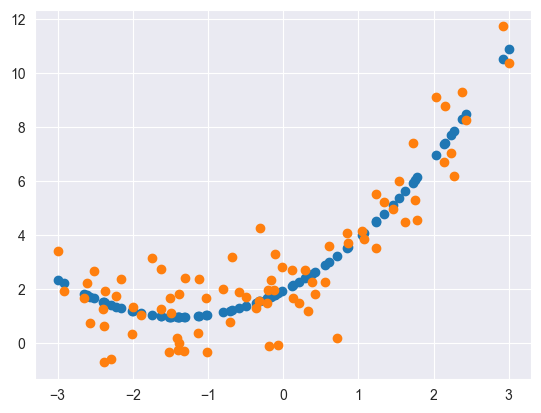

In [66]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, regression.predict(X_test_poly))
print(mse)

0.8608813660799021


## Prediction for new Data

In [68]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

In [69]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

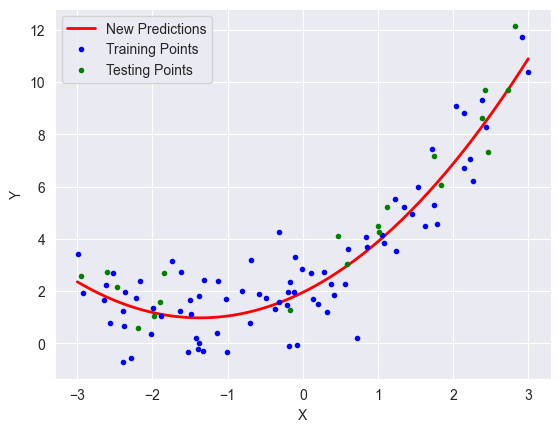

In [72]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Pipeline Concepts

In [73]:
from sklearn.pipeline import Pipeline

In [78]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features',poly_features),
        ('lin_reg', lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    #Plotting Prediction line
    plt.plot(X_new, y_pred_new, 'r-', linewidth=2, label='Predictions with Degree'+str(degree))
    plt.plot(X_train, y_train, 'b.',linewidth=3, label='Training Points')
    plt.plot(X_test, y_test, 'g.', label='Testing Points', linewidth=3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.axis([-4,4,0,10])
    plt.show()

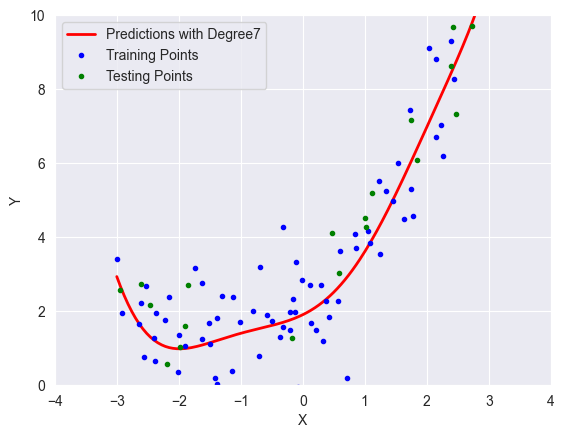

In [83]:
poly_regression(7)